In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.svm import SVC

In [12]:
df = pd.read_csv(r"/Users/arunabhapani/Desktop/credit_risk_assessment/bankloans.csv")

In [13]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [14]:
df.shape

(1150, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [16]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [17]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [18]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [19]:
df.dropna(inplace = True)

In [20]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<Axes: xlabel='age', ylabel='income'>

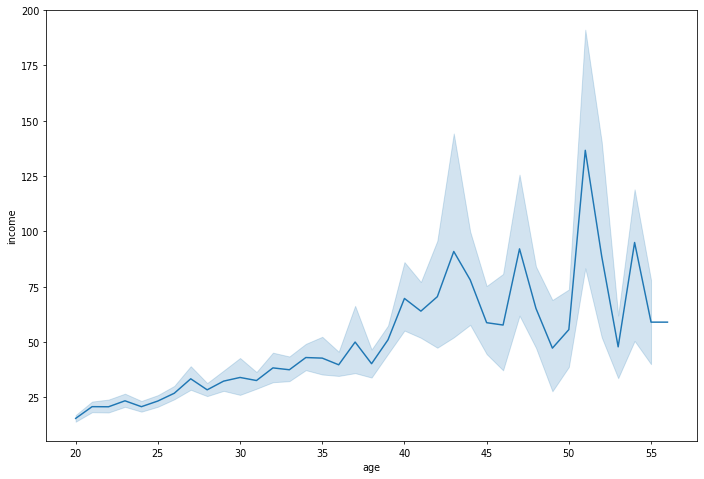

In [21]:
fig,ax = plt.subplots(figsize = (12,8), dpi = 70)
sns.lineplot(x = 'age', y = 'income', data = df)

<Axes: xlabel='age', ylabel='debtinc'>

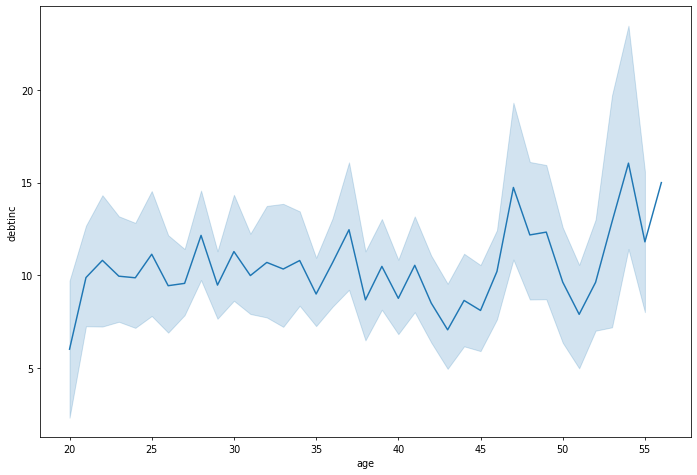

In [22]:
fig,ax = plt.subplots(figsize = (12,8), dpi = 70)
sns.lineplot(x = 'age', y = 'debtinc', data = df)

In [23]:
df['total_debt'] = df['othdebt'] + df['creddebt']
df['total_debt_ratio'] = df['total_debt'] / df['income']

In [24]:
df['credit_debt_ratio'] = df['creddebt'] / df['income']
df['oth_debt_ratio'] = df['othdebt'] / df['income']

In [25]:
df['high_debt_flag'] = df['debtinc'].apply(lambda x : 1 if x > 15 else 0)
df['overleveraged'] = df['total_debt_ratio'].apply(lambda x : 1 if x > 0.4 else 0)

In [26]:
df['total_experience'] = df['age'] - df['employ']

In [27]:
df['job_stability'] = df['employ'] / df['age']
df['residence_stability'] = df['address'] / df['age']

In [28]:
df['income_x_employ'] = df['income'] * df['employ']
df['income_per_year_at_address'] = df['income'] / (df['address'] + 1)

In [29]:
correlation = df.corr()

In [30]:
correlation

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,total_debt,total_debt_ratio,credit_debt_ratio,oth_debt_ratio,high_debt_flag,overleveraged,total_experience,job_stability,residence_stability,income_x_employ,income_per_year_at_address
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657,0.355121,0.016398,0.034637,0.000882,-0.025200,-0.008803,0.618738,0.335622,0.423632,0.479151,0.017579
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676,0.148862,0.008838,-0.011329,0.019484,0.021705,-0.029477,0.167970,-0.206216,0.061382,0.045374,0.123714
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978,0.446016,-0.031182,0.025019,-0.059268,-0.034856,0.031901,-0.331017,0.956093,0.234559,0.774793,0.147007
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451,0.241564,0.011323,0.031218,-0.004018,-0.000489,-0.001545,0.368143,0.199970,0.961334,0.300064,-0.445123
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970,0.654803,-0.026777,0.015453,-0.047073,-0.021967,0.027142,-0.041590,0.518924,0.228876,0.902016,0.271462
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575,0.608023,1.000000,0.759401,0.911053,0.801166,0.172084,0.047364,-0.047083,0.015307,-0.026725,-0.075338
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740,0.855179,0.501767,0.688059,0.262585,0.391176,0.240689,-0.045712,0.341726,0.155973,0.538974,0.089893
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713,0.942641,0.584870,0.306806,0.619880,0.467106,0.134258,0.002385,0.329311,0.172893,0.526182,0.116969
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000,0.203114,0.389575,0.391336,0.294411,0.331807,0.063574,0.109504,-0.306225,-0.169401,-0.128097,0.026481
total_debt,0.355121,0.148862,0.446016,0.241564,0.654803,0.608023,0.855179,0.942641,0.203114,1.000000,0.608023,0.502162,0.528322,0.481475,0.193696,-0.018115,0.367880,0.183034,0.584770,0.117090


<Axes: >

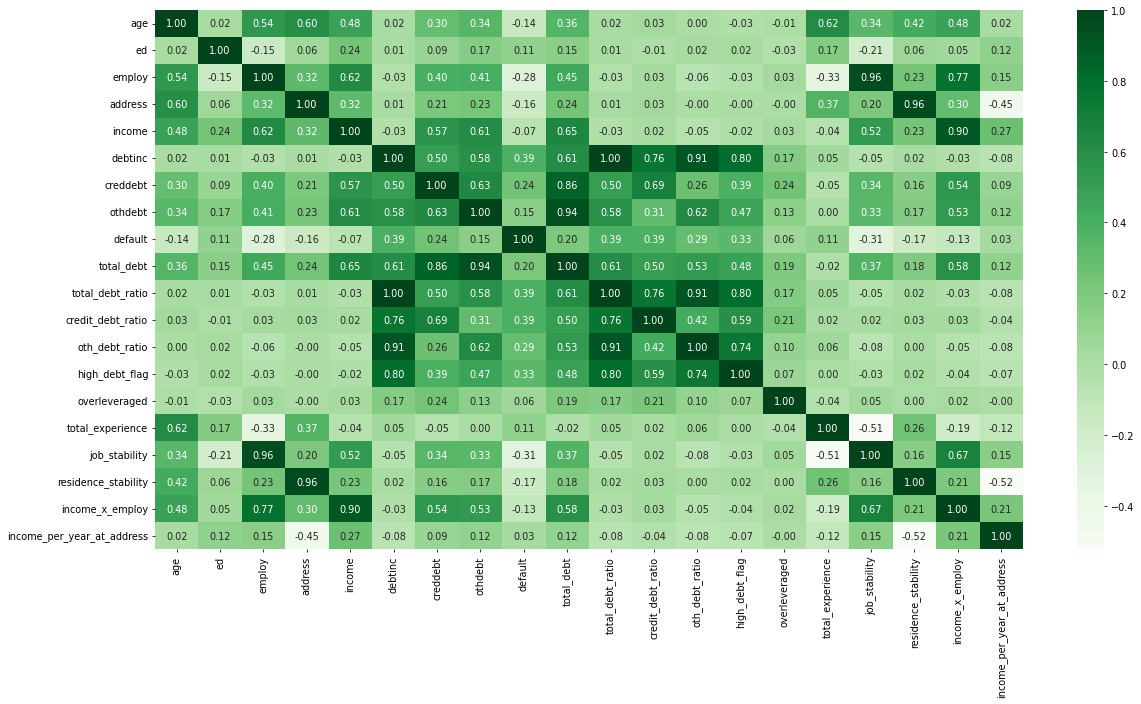

In [31]:
plt.figure(figsize = (20,10), dpi = 70)
sns.heatmap(correlation, cmap = 'Greens', annot = True, fmt = '.2f')

In [32]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [33]:
X = df.drop(['default'], axis = 1)
y = df['default']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
SC = StandardScaler()

In [36]:
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [37]:
lr_model = LogisticRegression()

In [38]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = lr_model.predict(X_test)

In [40]:
acs_lr = accuracy_score(y_test, y_pred_lr)

In [41]:
acs_lr

0.8398268398268398

In [42]:
msr_lr = mean_squared_error(y_test,y_pred_lr)
msr_lr

0.16017316017316016

In [43]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_lr

0.14819613314729885

In [44]:
rfc = RandomForestClassifier(n_estimators = 200)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [46]:
rfc.score(X_test,y_test)

0.8051948051948052

In [47]:
y_pred_rfc = rfc.predict(X_test)

In [48]:
acs_rfc = accuracy_score(y_test,y_pred_rfc)
acs_rfc

0.8051948051948052

In [49]:
msr_rfc = mean_squared_error(y_test,y_pred_rfc)
msr_rfc

0.19480519480519481

In [50]:
rfc_cvc = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_cvc
rfc_cvc.mean()

0.7672987974098057

In [51]:
svc = SVC()

In [52]:
svc.fit(X_train, y_train)

SVC()

In [53]:
svc.score(X_test, y_test)

0.8095238095238095

In [54]:
model = GridSearchCV(
    svc,
    {
        "C": [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
        "gamma": [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
        "kernel": ['rbf', 'linear']
    },
    scoring='accuracy',
    cv=10
)

In [55]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [56]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [57]:
model2 = SVC(C = 0.1, gamma = 0.1, kernel = 'linear')

In [58]:
model2.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [59]:
model2.score(X_test, y_test)

0.8354978354978355

<Axes: >

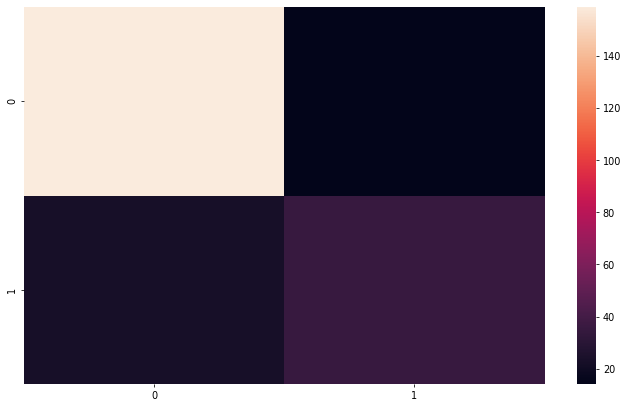

In [60]:
con_mat = confusion_matrix(y_test, y_pred_lr)
fig,ax = plt.subplots(figsize = (12,7), dpi = 70)
sns.heatmap(con_mat)

In [61]:
final_submission = pd.DataFrame(y_pred_lr)
final_submission.to_csv('submission', index = False)

In [132]:
final_submission

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
226,0.0
227,1.0
228,0.0
229,1.0
